In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns

In [2]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import STOPWORDS
import nltk
from konlpy.tag import Twitter
t = Twitter()

In [3]:
# ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Î¶¨Î∑∞Í∞Ä Ï†ÄÏû•Îêú ÌååÏùºÏùÑ ÏùΩÎäîÎã§.
review = open('./review.txt', encoding='utf-8').read()
review

'ÎßàÎ£®Í∞Ä ÏÇ¨Îäî Ï™ΩÏù¥ „ÖÇ„Ñ±Ï≤úÏù∏ÏßÄ ÎòëÍ∞ôÎÑ§Ïöî! ÏûëÍ∞ÄÎãòÍªò ÎßàÎ£®Îäî ÏàúÏàòÌïú ÏÇ¨Îûë Í∑∏ ÏûêÏ≤¥Ïù∏Í∞ÄÎ¥ÖÎãàÎã§. Ï†ÄÎäî ÏÇ¨Ïã§ ÎèôÎ¨ºÏùÑ Î¨¥ÏÑúÏõåÌï¥ÏÑú Í∞ÄÎÅîÏÇ∞Ï±ÖÌïòÎã§Î≥¥Î©¥ Î∂àÌé∏Ìï†ÎïåÍ∞Ä Ï¢ÖÏ¢Ö ÏûàÏóàÎäîÎç∞ ÏïûÏúºÎ°úÎäî Ïö∞Î¶¨ÎèôÎÑ§Ïóê ÎßàÎ£®Í∞Ä ÏûàÎã§Í≥† ÏÉùÍ∞ÅÌïòÎ©∞ ÏòàÏÅòÍ≤å Î≥ºÏàòÏûàÏùÑÍ≤ÉÍ∞ôÏäµÎãàÎã§üòäüòä \nÏïÑ ÎÑàÎ¨¥ Í∑ÄÏóΩÎãπ....\nÏûÑÏ£ºÏä§Ïî® Ï£ºÏä§ ÏñºÏñ¥ÏÑú Ïä¨Îü¨Ïâ¨ ÎêòÍ≤†Ïñ¥Ïöî\nÏÑúÏú®Ïù¥ Ï†ïÏàòÎ¶¨ ÎÑàÎ¨¥Í∑ÄÏó¨Ïõå„Öã„Öã„Öã„Öã ÏïûÏúºÎ°úÎÑòÏñ¥ÏßÄÍ≥† Ïö∞ÎäîÍ±∞ Ï∞∏ÎäîÍ≤ÉÎèÑ Í∑ÄÏó¨Ïõå Îπ®ÏïÑÎ®πÏñ¥ Ìò∏Î°úÎ°ù\nÏóâÏóâ Í≤ÄÏùÄÍ≥†ÏñëÏù¥ ÎÇ¥Í∞Ä ÌÇ§Ïö∏Îûò ÌùëÌùë\nÌÉÑÏïÑ ÎÑàÎ¨¥ Í∑ÄÏóΩÎã§..„Ö†„Ö†\nÏπòÏ¶àÍ≥†ÏñëÏù¥ tnr ÎïåÎ¨∏Ïóê Í∑Ä ÌïúÏ™Ω Ïß§Î¶∞Í±∞ ÎîîÌÖåÏùºÎ¥ê..\nÏ†ÄÎü¨Í≥† ÏÑ†Î¨º Îßâ ÏÜåÎ∞ïÌïòÍ≤å Í∞úÍªå Îßâ Ïù¥Îü¨ÎäîÍ±∞ ÏïÑÎãò? „Öé„Öé„Öé„Öé„Öé„Öé„Öé\nÏÇ¨ÎûëÌï¥ ÎßàÎ£®Ìà∞ „Ö†„Ö†\nÎÇòÎÑàÎ¨¥ÌñâÎ≥µÌï¥... \nÏïÑ ÏßÑÏßú ÌûêÎßÅÌà∞Ïù¥Îã§..üíï\nÏπòÏ¶àÍ≥†ÏñëÏù¥ ÏñëÎßêÎÉÑÏÉà Îß°Í≥†„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã\nÏó¨Í∏∞ Î≥ÑÏ†ê 10Ï†êÎßêÍ≥† 100000Ï†êÏùÄ Î™ªÏ£ºÎÇòÏöî..„Ö†\nÏïÑÎ¨¥

In [4]:
# ÌïúÍ∏Ä ÌòïÌÉúÏÜå Î∂ÑÏÑùÏùÑ Ïã§ÌñâÌïúÎã§.
review_tokens = t.nouns(review)
review_tokens

['ÎßàÎ£®',
 'Ï™Ω',
 'Ï≤úÏù∏',
 'ÏûëÍ∞Ä',
 'ÎßàÎ£®',
 'ÏÇ¨Îûë',
 'Í∑∏',
 'ÏûêÏ≤¥',
 'Ï†Ä',
 'ÏÇ¨Ïã§',
 'ÎèôÎ¨º',
 'Í∞ÄÎÅî',
 'ÏÇ∞Ï±Ö',
 'Îïå',
 'Ï¢ÖÏ¢Ö',
 'Ïïû',
 'Ïö∞Î¶¨ÎèôÎÑ§',
 'ÎßàÎ£®',
 'ÏÉùÍ∞Å',
 'ÏûÑ',
 'Ï£ºÏä§',
 'Ï£ºÏä§',
 'Ïä¨Îü¨Ïâ¨',
 'Ïú®',
 'Ï†ïÏàòÎ¶¨',
 'Ïïû',
 'Îπ®',
 'ÏóâÏóâ',
 'Í≥†ÏñëÏù¥',
 'ÎÇ¥',
 'ÏπòÏ¶à',
 'Í≥†ÏñëÏù¥',
 'ÎïåÎ¨∏',
 'Í∑Ä',
 'ÌïúÏ™Ω',
 'Ïß§Î¶∞Í±∞',
 'ÎîîÌÖåÏùº',
 'ÏÑ†Î¨º',
 'Îßâ',
 'Í∞úÍªå',
 'Îßâ',
 'ÏÇ¨Îûë',
 'ÎßàÎ£®',
 'Ìà∞',
 'ÎÇò',
 'ÏßÑÏßú',
 'ÌûêÎßÅÌà∞',
 'ÏπòÏ¶à',
 'Í≥†ÏñëÏù¥',
 'ÏñëÎßê',
 'ÎÉÑÏÉà',
 'Ïó¨Í∏∞',
 'Ï†ê',
 'Ï†ê',
 'Ï†ê',
 'ÏïÑÎ¨¥',
 'ÏπòÏ¶à',
 'Ïù¥',
 'ÏñëÎßê',
 'ÎÉÑÏÉà',
 'ÌëúÏ†ï',
 'Î∂ÄÎ∂Ñ',
 'Ïã§Ï†ú',
 'Í≥†ÏñëÏù¥',
 'ÎÉÑÏÉà',
 'Ï∂©Í≤©',
 'ÏûÖ',
 'ÌëúÏ†ï',
 'Îïå',
 'ÌîåÎ†àÎ©ò',
 'Î∞òÏùë',
 'ÏïÖÏ∑®',
 'Í≤ΩÏïÖ',
 'Í≤É',
 'Î≥¥Ïäµ',
 'ÏΩî',
 'Í∏∞Í¥Ä',
 'Í≥µÍ∏∞',
 'ÎÉÑÏÉà',
 'Î¨ºÏßà',
 'Í≤ÄÏÇ¨',
 'Îïå',
 'ÌëúÏ†ï',
 'Í≥†ÏñëÏù¥',
 'Ïô∏',
 'Í≥†Ïñë',
 'ÎèôÎ¨º',
 'ÏÇ¨Ïûê',
 'Ìò∏ÎûëÏù¥',
 'Îßê',
 'ÏÇ¨Ïä¥',
 'Î∞òÏùë',
 'ÎÉ•',
 'Ï∂©Í≤©',
 'Ïñº

In [5]:
# Î∂àÏö©Ïñ¥Î•º Ï†ïÏùòÌïúÎã§.
stop_words = ['ÏûêÏ≤¥', 'Í∞ÄÎÅî', 'Ï¢ÖÏ¢Ö', 'ÏóâÏóâ', 'Ïß§Î¶∞Í±∞', 'ÎïåÎ¨∏', 'ÏßÑÏßú', 'ÌïúÏ™Ω', 'ÏïÑÎ¨¥', 'Î∂ÄÎ∂Ñ', 'Ïã§Ï†ú']
review_tokens = [each_word for each_word in review_tokens if each_word not in stop_words and len(each_word) > 1]
review_tokens

['ÎßàÎ£®',
 'Ï≤úÏù∏',
 'ÏûëÍ∞Ä',
 'ÎßàÎ£®',
 'ÏÇ¨Îûë',
 'ÏÇ¨Ïã§',
 'ÎèôÎ¨º',
 'ÏÇ∞Ï±Ö',
 'Ïö∞Î¶¨ÎèôÎÑ§',
 'ÎßàÎ£®',
 'ÏÉùÍ∞Å',
 'Ï£ºÏä§',
 'Ï£ºÏä§',
 'Ïä¨Îü¨Ïâ¨',
 'Ï†ïÏàòÎ¶¨',
 'Í≥†ÏñëÏù¥',
 'ÏπòÏ¶à',
 'Í≥†ÏñëÏù¥',
 'ÎîîÌÖåÏùº',
 'ÏÑ†Î¨º',
 'Í∞úÍªå',
 'ÏÇ¨Îûë',
 'ÎßàÎ£®',
 'ÌûêÎßÅÌà∞',
 'ÏπòÏ¶à',
 'Í≥†ÏñëÏù¥',
 'ÏñëÎßê',
 'ÎÉÑÏÉà',
 'Ïó¨Í∏∞',
 'ÏπòÏ¶à',
 'ÏñëÎßê',
 'ÎÉÑÏÉà',
 'ÌëúÏ†ï',
 'Í≥†ÏñëÏù¥',
 'ÎÉÑÏÉà',
 'Ï∂©Í≤©',
 'ÌëúÏ†ï',
 'ÌîåÎ†àÎ©ò',
 'Î∞òÏùë',
 'ÏïÖÏ∑®',
 'Í≤ΩÏïÖ',
 'Î≥¥Ïäµ',
 'Í∏∞Í¥Ä',
 'Í≥µÍ∏∞',
 'ÎÉÑÏÉà',
 'Î¨ºÏßà',
 'Í≤ÄÏÇ¨',
 'ÌëúÏ†ï',
 'Í≥†ÏñëÏù¥',
 'Í≥†Ïñë',
 'ÎèôÎ¨º',
 'ÏÇ¨Ïûê',
 'Ìò∏ÎûëÏù¥',
 'ÏÇ¨Ïä¥',
 'Î∞òÏùë',
 'Ï∂©Í≤©',
 'ÏñºÍµ¥',
 'ÏÇ¨Îûå',
 'Î≥¥Í∏∞',
 'Íµ¨Î¶Ñ',
 'ÏõπÌà∞',
 'Î≥¥Í∏∞',
 'ÎåìÍ∏Ä',
 'Ï≤òÏùå',
 'Î¨¥ÏßÄÍ∞ú',
 'Îã§Î¶¨',
 'Í±¥ÎÑà',
 'Ï≤úÍµ≠',
 'Î∞òÎ†§Í≤¨',
 'Í∞ÄÏ°±',
 'ÎèôÏÉù',
 'ÎßàÎ£®',
 'ÏïÑÏù¥',
 'Í∞êÏ†ï',
 'Î™®Îëê',
 'Í≥µÍ∞ê',
 'ÏïÑÏâ¨ÏõÄ',
 'ÎèôÏãú',
 'ÎßàÎ£®',
 'Î≥¥Í≥†',
 'Í∑∏ÎÉ•',
 'Ï°∞Í±¥',
 'ÏÇ¨Îûë',
 'ÌëúÎ≥∏',
 'Í∞ïÏïÑÏßÄ',
 'Îü∞Í∞Ä',
 'Î

In [6]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ°ú Íµ¨ÌòÑÌï† Îã®Ïñ¥Îì§Ïùò Ï∂úÌòÑ ÎπàÎèÑÏàòÎ•º ÏÑºÎã§.
token = nltk.Text(review_tokens)
token.vocab().most_common(50)

[('ÎßàÎ£®', 396),
 ('Í≥†ÏñëÏù¥', 143),
 ('ÏπòÏ¶à', 93),
 ('ÌûêÎßÅ', 73),
 ('Ï§ëÏÑ±', 68),
 ('ÏûëÍ∞Ä', 48),
 ('ÏõπÌà∞', 46),
 ('Ïö∞Î¶¨', 46),
 ('ÏÑ†Î¨º', 44),
 ('ÏÉùÏùº', 37),
 ('ÏÇ¨Îûë', 35),
 ('Ï£ºÏä§', 32),
 ('ÎÉÑÏÉà', 31),
 ('Ï∂ïÌïò', 31),
 ('Î®∏Î¶¨', 28),
 ('Í∞ïÏïÑÏßÄÌíÄ', 28),
 ('ÎßàÏùå', 27),
 ('Ïò§Îäò', 26),
 ('ÌÅ¨Î¶¨Ïä§ÎßàÏä§', 25),
 ('ÌëúÏ†ï', 23),
 ('Ïñ∏Îãà', 22),
 ('Ï†úÎ∞ú', 22),
 ('Ïù¥Î™®Ìã∞ÏΩò', 22),
 ('ÎîîÌÖåÏùº', 20),
 ('ÏñëÎßê', 20),
 ('Íº¨Î¶¨', 20),
 ('Ïù¥Î≤à', 20),
 ('Í∑ÄÍ∞Ä', 18),
 ('Î≤ºÎùΩÏπòÍ∏∞', 18),
 ('ÏÉùÍ∞Å', 17),
 ('ÎààÎ¨º', 17),
 ('Î≥¥Í≥†', 16),
 ('Í∏∏Í≥†ÏñëÏù¥', 16),
 ('ÏµúÍ≥†', 16),
 ('Ïï†Í∏∞', 16),
 ('Í∏∞Ïó¨', 14),
 ('ÏïÑÍ∏∞', 14),
 ('ÎßåÌôî', 13),
 ('ÏñºÍµ¥', 12),
 ('ÏÇ¨Îûå', 12),
 ('Ïó∞Ïû¨', 12),
 ('Ï†ïÎßê', 12),
 ('Í∞ïÏ•ê', 11),
 ('ÏàòÏà†', 11),
 ('Îπ®Îûò', 11),
 ('ÌëúÏãú', 11),
 ('Í∏∏ÎÉ•Ïù¥', 11),
 ('Í∞ïÏïÑÏßÄ', 10),
 ('ÎèôÌôî', 10),
 ('ÏÇ∞ÌÉÄ', 10)]

In [7]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ°ú Íµ¨ÌòÑÌï† Îã®Ïñ¥Î•º ÎΩëÏïÑÎÇ¥ÏÑú Îã®Ïñ¥Î•º keyÎ°ú ÌïòÍ≥† Ï∂úÌòÑ ÎπàÎèÑÏàòÎ•º valueÎ°ú ÌïòÎäî ÎîïÏÖîÎÑàÎ¶¨Î•º ÎßåÎì†Îã§.
data = dict(token.vocab().most_common(250))
data

{'ÎßàÎ£®': 396,
 'Í≥†ÏñëÏù¥': 143,
 'ÏπòÏ¶à': 93,
 'ÌûêÎßÅ': 73,
 'Ï§ëÏÑ±': 68,
 'ÏûëÍ∞Ä': 48,
 'ÏõπÌà∞': 46,
 'Ïö∞Î¶¨': 46,
 'ÏÑ†Î¨º': 44,
 'ÏÉùÏùº': 37,
 'ÏÇ¨Îûë': 35,
 'Ï£ºÏä§': 32,
 'ÎÉÑÏÉà': 31,
 'Ï∂ïÌïò': 31,
 'Î®∏Î¶¨': 28,
 'Í∞ïÏïÑÏßÄÌíÄ': 28,
 'ÎßàÏùå': 27,
 'Ïò§Îäò': 26,
 'ÌÅ¨Î¶¨Ïä§ÎßàÏä§': 25,
 'ÌëúÏ†ï': 23,
 'Ïñ∏Îãà': 22,
 'Ï†úÎ∞ú': 22,
 'Ïù¥Î™®Ìã∞ÏΩò': 22,
 'ÎîîÌÖåÏùº': 20,
 'ÏñëÎßê': 20,
 'Íº¨Î¶¨': 20,
 'Ïù¥Î≤à': 20,
 'Í∑ÄÍ∞Ä': 18,
 'Î≤ºÎùΩÏπòÍ∏∞': 18,
 'ÏÉùÍ∞Å': 17,
 'ÎààÎ¨º': 17,
 'Î≥¥Í≥†': 16,
 'Í∏∏Í≥†ÏñëÏù¥': 16,
 'ÏµúÍ≥†': 16,
 'Ïï†Í∏∞': 16,
 'Í∏∞Ïó¨': 14,
 'ÏïÑÍ∏∞': 14,
 'ÎßåÌôî': 13,
 'ÏñºÍµ¥': 12,
 'ÏÇ¨Îûå': 12,
 'Ïó∞Ïû¨': 12,
 'Ï†ïÎßê': 12,
 'Í∞ïÏ•ê': 11,
 'ÏàòÏà†': 11,
 'Îπ®Îûò': 11,
 'ÌëúÏãú': 11,
 'Í∏∏ÎÉ•Ïù¥': 11,
 'Í∞ïÏïÑÏßÄ': 10,
 'ÎèôÌôî': 10,
 'ÏÇ∞ÌÉÄ': 10,
 'ÌëúÌòÑ': 10,
 'ÏÇ¥Ïßù': 9,
 'Ïû•Î©¥': 9,
 'ÏÇ∞ÌÉÄÌï†ÏïÑÎ≤ÑÏßÄ': 9,
 'Í∞êÎèô': 9,
 'ÏπúÍµ¨': 9,
 'Ï∂©Í≤©': 8,
 'ÏôÑÏ†Ñ': 8,
 'Í±¥Í∞Ä': 8,
 'Î∞îÎ°ú': 8,
 'Í∏∞ÏóΩÎã§': 8,
 'ÌòÑÏã§': 8,
 'Ïó∞Îßê': 8,
 'ÏÇ¨

In [8]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÎßàÏä§ÌÅ¨ Ïù¥ÎØ∏ÏßÄ
mask = np.array(Image.open('./mask.png'))

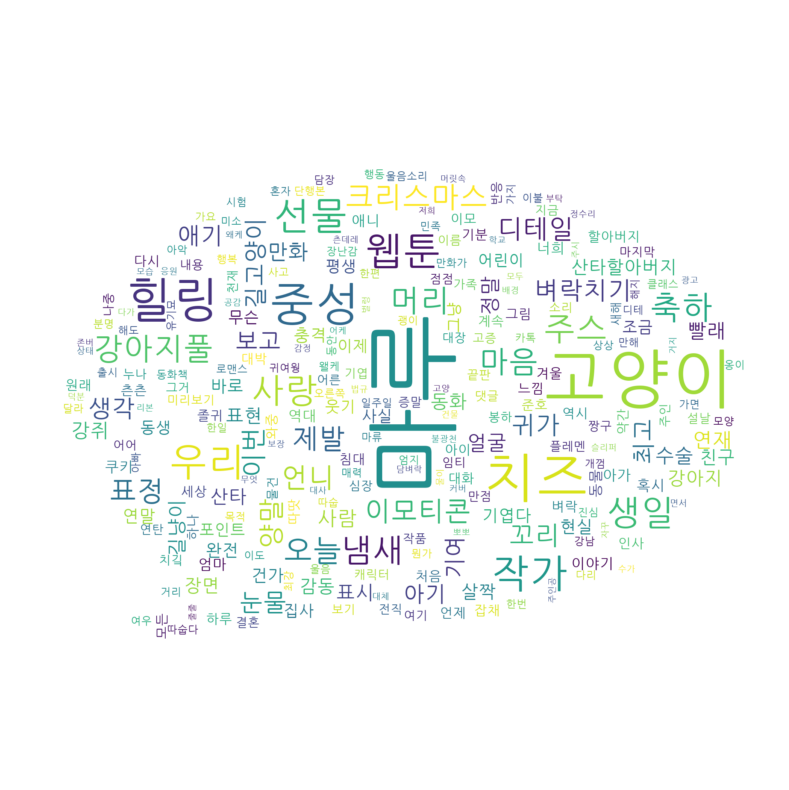

In [9]:
# ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞Îäî generate_from_frequencies() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º ÎßåÎì†Îã§.
wordcloud = WordCloud(
    font_path='C:\\WINDOWS\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    max_font_size=250,
    max_words=250,
    mask=mask
).generate_from_frequencies(data)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()